# Neural networks

## Basics

+ Let's start by relating neural networks to regression. 
+ Consider a simple case where we have two nodes, $1$ and $X$ pointing to an outcome $Y$. 
+ What does this mean? Let's first put some context around the problem. 
+ Imagine that we want to use a subject's BMI $X$ to predict their blood pressure, $Y$. 
+ This diagram represents that.

In [ ]:
import graph
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import sklearn as skl

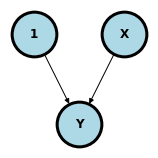

In [6]:
graph.basic_nn()

## To interpret this diagram as a neural network, consider the following rule:


* Parent nodes that point to a child node are multiplied by weights then added together then operated on by an activation function to form the child node.*

+ If the parent nodes point to the outcome, then the nodes are combined the operated on by a known function, called the **activation function** to form a prediction. 

+ So, in this case, this is saying that the intercept (node labeled $1$) times a weight plus BMI (node labeled $X$) times a different weight get combined to form a prediction for SBP $Y$. Or, in other words

$$
\hat Y = g(w_0 \times 1 + w_1 \times X)
$$

+ where $g$ is a function that we specify. So in this case, if $w_0 = 120$, $w_1 = .1$ and $g$ is an idenity function, $g(a) = a$, and a subject had a BMI of 30, then the prediction would be 

$$
\hat Y = g(120 + .1 * 30) = 120.3
$$

+ Note $g$ is not shown in the diagram (though maybe you could with the shape of the child + node) or something like that0. Also not shown in the daigram is:
+ The loss function, i.e. how to measure the different between $\hat Y$ and $Y$.
+ The way the loss function combines subjects; we have multiple BMIs and SBPs
+ How we obtain the weights, $W_0$ and $W_1$; this is done by minmizing the loss function using an algorithm

### Linear regression as a NN

+ Imagine the case where $g$ is an identity function, our loss function for different subjects is squared error and we combine different losses by adding them up. Then, our weights are obtained by minmizing

$$
\sum_{i=1}^N (Y_i - \hat Y_i)^2 
$$

+ and so, presuming our optimization algorithm works well, it should be idential to linear regression. 

### Logistic regression as a NN

+ Consider a different setting. Imagine if our $Y$ is 0 or 1 based on whether or not the subject is taking anti-hypertensive mediations. 
+ Further, let $g$ be the sigmoid function, $g(a) = 1 / \{1 + \exp(-a)\}$. 
+ Our prediction is

$$
\hat Y = \{1 + \exp(-W_0 - W_1 X)\}^{-1}
$$

+ which is the logistic regression prediction with intercept $W_0$ and slope $W_1$. Consider a case where

### Example

+ $W_0 = -4$, $W_1 = .1$ and $X=30$, then our $\hat Y = 1 / \{1 + \exp[-(-4 + .1\times 30)\}]\approx .27$. 
+ Thus, this model estimates a 27% probability that a subject with a BMI of 30 has hypertension.

In [2]:
1 / (1 + np.exp(-(-4 + .1 * 30)))

0.2689414213699951

+ Further, if we specify that the loss function is binary cross entropy

$$
- \sum_{i=1}^n \{ Y_i \log(\hat Y_i) + (1 - Y_i) \log(1 - \hat Y_i)\} / N
$$

+ then minmizing our loss function is identical to maximizing the likelihood for logistic regression. 

## More layers

+ NNs get better when we add more layers, since then they can discover interactions and non-linearities. 
+ Consider the following model. Notice we quit explicitly adding the bias (intercept) term / node. 

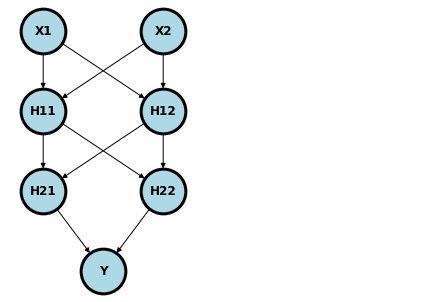

In [7]:
graph.two_layer_nn()

+ Usually, the nodes are added in so called layers. $(X_1, X_2)$ is the input layer, 
+ $(H_{11}, H_{12})$ is the first hidden layer, 
+ $(H_{21}, H_{22})$ is the second hidden layer and $Y$ is the output layer. 
+ Imagine plugging an $X_1$ and $X_2$ into this network. It would feed forward through the network as

$$
\begin{align}
H_{11} = & g_1(W_{011} + W_{111} X_1 + W_{211} X_2) \\
H_{12} = & g_1(W_{012} + W_{112} X_1 + W_{212} X_2) \\
H_{21} = & g_2(W_{021} + W_{121} H_{11} + W_{221} H_{12}) \\
H_{22} = & g_2(W_{022} + W_{122} H_{12} + W_{222} H_{12}) \\
\hat Y = & g_3(W_{031} + W_{131} H_{21} + W_{231} H_{22})
\end{align}
$$

+ where $g_k$ are specified activation functions. 
+ Typically, we would have a different activation function for the output layer than the others, and the other would have the same activation function.

## Activation functions

+ The output activation function tends to be based on the structure of the outcome. 
+ For example, a binary outcome would likely have a sigmoidal, or other function from $\mathbb{R}$ to $[0, 1]$ so as to model a probability. 
+ The most popular right now is the rectified linear unit (RELU) function. 

$$
RELU(a) = \left\{
\begin{array}{ll}
a & \text{if $a>0$} \\
0 & \text{otherwise}
\end{array}
\right.
= a \times I(a > 0)
$$

Plotted, this is: 

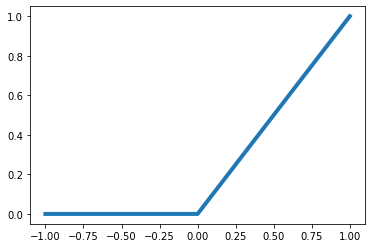

In [8]:
plt.plot( [-1, 0, 1], [0, 0, 1], linewidth = 4);

+ If a bias term is included, then the fact that the RELU is centered at zero isn't important, since the intercept term effectively shifts the function around. 
+ These kinds of splin terms are incredibly flexible. Just to show you an example, let's fit the sine function using a collection of shifted RELUs. This is just

$$
Y = \sin(X) + \epsilon
$$

+ being fit with

$$
\sum_{i=1}^N \left\{ Y_i - W_{021} - \sum_{j=1}^{d} W_{j21} g(W_{1j1} X_i- W_{0j1}) \right\}^2
$$

+ where the $W_{kj}$ are the weights for layer $k$. Below, we're just setting $W_{1j1} = 1$ and specifying the $W_{0j1}$ at a sequence of values. 

This corresponds to a network like depicted below if there were $d=3$  hidden nodes, there was a relu activation function at the first layer, then a identity activation function for the output layer and the weights for the first layer are specified.

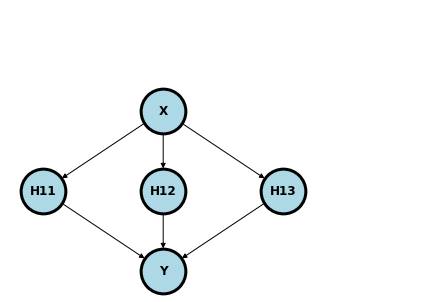

In [9]:
graph.spline_graph()

We can actually fit this function way just using linear regression; we show this code below

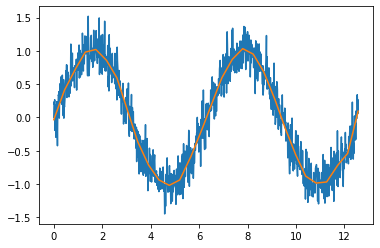

In [6]:
## Generate some data, a sine function on 0,4*pi
n = 1000
x = np.linspace(0, 4 * np.pi, n)
y = np.sin(x) + .2 * np.random.normal(size = n)

## Generate the spline regressors
df = 30
knots = np.linspace(x.min(), x.max(), df)
xmat = np.zeros((n, df))
for i in range(0, df): xmat[:,i] = (x - knots[i]) * (x > knots[i])

## Fit them
from sklearn.linear_model import LinearRegression
yhat = LinearRegression().fit(xmat, y).predict(xmat)

## Plot them versus the data
plt.plot(x, y);
plt.plot(x, yhat);

## Optimization

One of the last bits of the puzzle we have to figure out is how to obtain the weights. A good strategy would be to minimize the loss function. However, it's hard to minmize. If we had a derivative, we could try the following. Let $L(W)$ be the loss function for weights $W$. Note, we're omitting the fact that this is a function of the data (predictors and outcome) as well, since that's a set of fixed numbers.

### Gradient descent 

+ Consider updating parameters as

$$
W^{(new)} = W^{(old)} - e * L'(W^{(old)})
$$

+ This moves the parameters by a small amount, $e$, called the **learning rate**, in the direction the opposite of the gradient. 
+ Think of a one dimensional convex function. If the derivative at a point is positive, then that point is larger than where the minimum is. Similarily, if the derivative is negative, it's smaller. So, the idea is to head a small amount in the opposite direction of the derivative. 

+ How do we get the gradient? Consider the following. 
+ If $X$ is our vector of predictors and $Y$ is our vector of outputs, a neural network with 3 layers, can be thought of as, where $L_k$ is layer $K$ and $W_k$ are the weights for that layer:

$$
L_3(L_2(L_1(X, W_1), W_2) W_3)
$$


### Chain Rule

+ Recall from calculus, if we want the derivative of composed functions we have a really simple rule called the chain rule:

$$
\frac{d}{dx}f(g(x)) = f'(g(x)) g'(x)
$$

+ I.e. if $h=f(u)$ and $u = g(x)$ then $\frac{dh}{dx} = \frac{dh}{du}\frac{du}{dx}$. 

+ If we use the chain rule on our composed loss functions, we wind up bookkeeping backwards through our neural network. That is why it's called **backwards propagation (backprop)**. 

### Algorithm schematic

Given, $W^{(new)}$, network, $\phi(X, W)$, which depends on the predictors and the weights 
and loss, $L(Y, \hat Y)$, which depends on the observed and predicted outputs.

0. Set $W^{(old)}=W^{(new)}$
1. Calculate $\hat Y = \phi(X, W^{(old)})$ and loss $L(Y, \hat Y)$.
1. Use back propagation to get to get a numerical approximation to $\frac{d}{dW} L\{Y, \phi(X, W)\} |_{W=W^{(old)}} = L'(W^{(old)})$
3. Update $W^{(new)} = W^{(old)} - e L'(W^{(old)})$
4. Go to step 0.